## Lab 6: Intrinsic Dimension and Density Estimation
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

# Exercise 1
Using the ```dry_beans_dataset``` as we did in previous laboratories (ie. follow the same proprocessing steps but do not perform the train-test split), program your own implementation of the two-NN estimate for the Intrinsic Dimension. 

Is the result comparible with what you would expect from an analysis of PCA's spectrum?

In [4]:
df = pd.read_excel("../Datasets/Dry_Bean_Dataset.xlsx")

In [5]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
y = df['Class']
X = df.drop('Class', axis=1)

In [7]:
encoder = OrdinalEncoder()
y=np.array(y)
encoder.fit(y.reshape(-1,1))
y = encoder.transform(y.reshape(-1,1))
print(y)

[[5.]
 [5.]
 [5.]
 ...
 [3.]
 [3.]
 [3.]]


In [8]:
X_mean = X.mean()       #in this case we perform it on the whole dataset (no train-test split)
X_std=X.std()   

In [9]:
X = (X-X_mean)/X_std

In [10]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840718,-1.143277,-1.306550,-0.631130,-1.564995,-2.185640,-0.841420,-1.063302,0.289077,0.367600,1.423815,1.839049,0.680761,2.402085,1.925653,0.838340
1,-0.829157,-1.013887,-1.395860,-0.434429,-1.969712,-3.685904,-0.826071,-1.044178,0.697451,-0.462890,0.231046,2.495358,0.367953,3.100779,2.689603,0.771110
2,-0.807128,-1.078789,-1.252311,-0.585713,-1.514236,-2.045261,-0.808674,-1.008047,0.578174,0.518398,1.252819,1.764778,0.603107,2.235009,1.841288,0.916721
3,-0.785712,-0.977179,-1.278778,-0.439274,-1.741554,-2.742110,-0.773947,-0.973301,0.671235,-2.241685,0.515030,2.081639,0.401703,2.514982,2.204169,-0.197978
4,-0.781210,-1.097344,-1.380420,-0.266654,-2.117915,-4.534862,-0.784257,-0.966044,0.476003,0.804743,1.874924,2.765229,0.118264,3.270862,3.013352,0.939605


In [11]:
pca=PCA()
pca.fit(X)

PCA()

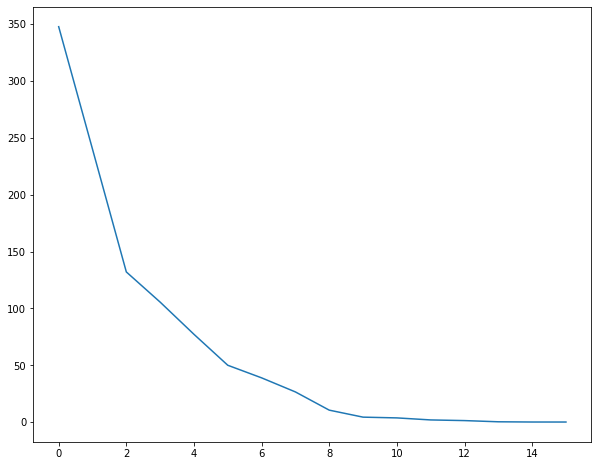

In [12]:
plt.figure(figsize=(10,8))
plt.plot(pca.singular_values_)
plt.show()

In [13]:
from dadapy.data import Data

In [14]:
data = Data(np.array(X))

In [15]:
id, _, r = data.compute_id_2NN()
#compute_id_2NN returns:
## id: estimated instrinsic dimension
## id_err: standard error on the id estimation
## rs: the average nearest neighbor distance

C:\Users\ilari\anaconda3\lib\site-packages\dadapy\_utils\utils.py:149: UserWarning: there may be data with zero distance from each other; this may compromise the correct behavior of some routines
  warnings.warn(
C:\Users\ilari\anaconda3\lib\site-packages\dadapy\id_estimation.py:204: RuntimeWarning: divide by zero encountered in true_divide
  mus[:, j] = distances[:, 2] / distances[:, 1]


In [16]:
print(f"Intrisic Dimension = {id}\nr = {r}")

Intrisic Dimension = 5.560503504672993
r = 0.4793137556123286


In [17]:
#let us see what happens if we remove those instances for which the distance to their first NN is null
data.compute_distances(maxk=2)

C:\Users\ilari\anaconda3\lib\site-packages\dadapy\_utils\utils.py:149: UserWarning: there may be data with zero distance from each other; this may compromise the correct behavior of some routines
  warnings.warn(


In [18]:
data.distances

array([[0.  , 0.47, 0.57],
       [0.  , 1.06, 1.22],
       [0.  , 0.47, 0.55],
       ...,
       [0.  , 0.3 , 0.35],
       [0.  , 0.39, 0.41],
       [0.  , 0.23, 0.39]])

In [19]:
idx = np.where(data.distances[:,1]==0)
idx 
#as we said, it is only a small fraction of the dataset

(array([5504, 5505, 5508, 5509, 5547, 5548, 5553, 5554, 5598, 5599, 5622,
        5623, 5630, 5631, 5638, 5639, 5678, 5679, 5682, 5683, 5714, 5715,
        5720, 5721, 5755, 5756, 5812, 5813, 5820, 5821, 5837, 5838, 5938,
        5939, 5958, 5959, 6045, 6046, 6080, 6081, 6139, 6140, 6219, 6220,
        6255, 6256, 6306, 6307, 6325, 6326, 6423, 6424, 6441, 6442, 6450,
        6451, 6479, 6480, 6509, 6510, 6514, 6515, 6597, 6598, 6608, 6609,
        6689, 6690, 6762, 6763, 6777, 6778, 6787, 6788, 6802, 6803, 6890,
        6891, 6982, 6983, 7010, 7011, 7027, 7028, 7032, 7033, 7066, 7067,
        7094, 7095, 7122, 7123, 7135, 7136, 7143, 7144, 7171, 7172, 7179,
        7180, 7194, 7195, 7207, 7208, 7233, 7234, 7262, 7263, 7277, 7278,
        7284, 7285, 7339, 7340, 7341, 7342], dtype=int64),)

In [20]:
X = X.drop(idx[0])

In [21]:
data = Data(np.array(X))

In [22]:
id, _, r = data.compute_id_2NN()

In [23]:
print(f"Intrisic Dimension = {id}\nr = {r}")

Intrisic Dimension = 5.656512920048598
r = 0.48159997383354863


# Exercise 2
Using the following function, create a one-dimensional dataset of size $N=100$.

In [24]:
from scipy.stats import norm, t #normal distribution, t distribution

np.random.seed(44)

In [25]:
N = 100

X = np.concatenate(
    (np.random.standard_t(1, int(0.04*N))-3.5,np.random.normal(5, 1, int(0.48 * N)), np.random.normal(7.5, 1, int(0.48 * N)))
)[:, np.newaxis]

In [26]:
X.shape

(100, 1)

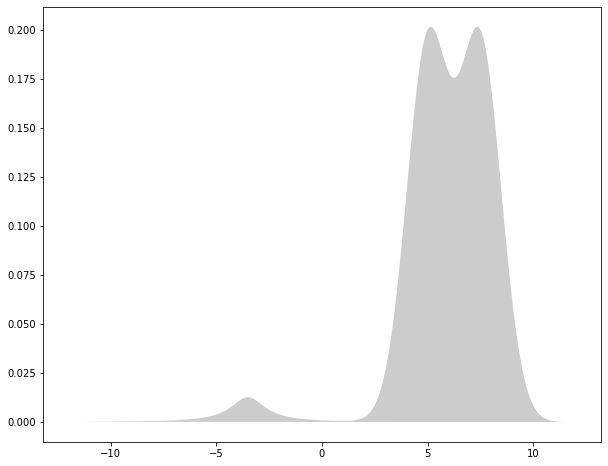

In [27]:
X_plot = np.linspace(-12,12, 1000)[:, np.newaxis]
true_dens = 0.04* t(df=1,loc=-3.5).pdf(X_plot[:, 0]) + 0.48* norm(5, 1).pdf(X_plot[:, 0]) + 0.48*norm(7.5,1).pdf(X_plot[:,0])

fig = plt.figure(figsize=(10,8))
plt.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2)

Compute the density estimation with your implementations of:
- Histogram Density Estimation (Freedman-Diaconis rule)

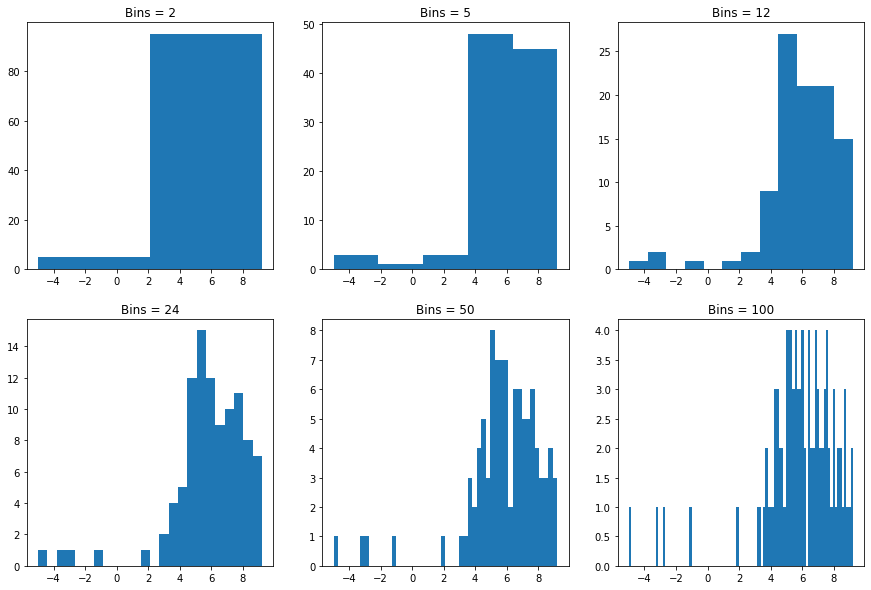

In [28]:
fig, axes = plt.subplots(2,3, figsize=(15,10))

for i,bin in enumerate([2,5,12,24,50,100]):
    ax = axes[i//3, i%3]
    ax.hist(X, bins=bin)
    ax.set_title(f"Bins = {bin}")
plt.show()

In [29]:
def friedman_diaconis(X):
    ''' 
    Select the number of bins such that bin=2*IQR(x)/(n^(1/3))
    '''
    q3, q1 = np.percentile(X, [75,25])
    iqr = q3 - q1
    return 2*iqr/(len(X)**(1/3))

In [30]:
bin_fd=friedman_diaconis(X)

In [31]:
print(bin_fd)

1.0522038535623301


[]

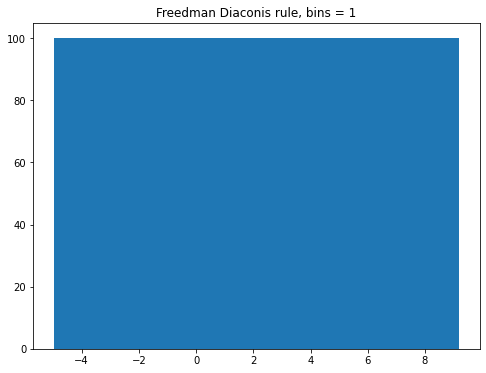

In [32]:
plt.figure(figsize=(8,6))

plt.hist(X, bins=int(bin_fd))
plt.title(f"Freedman Diaconis rule, bins = {int(bin_fd)}")
plt.plot()

- Kernel Density Estimation (KDE) - Gaussian kernel (Silverman's rule)

In [33]:
from sklearn.neighbors import KernelDensity

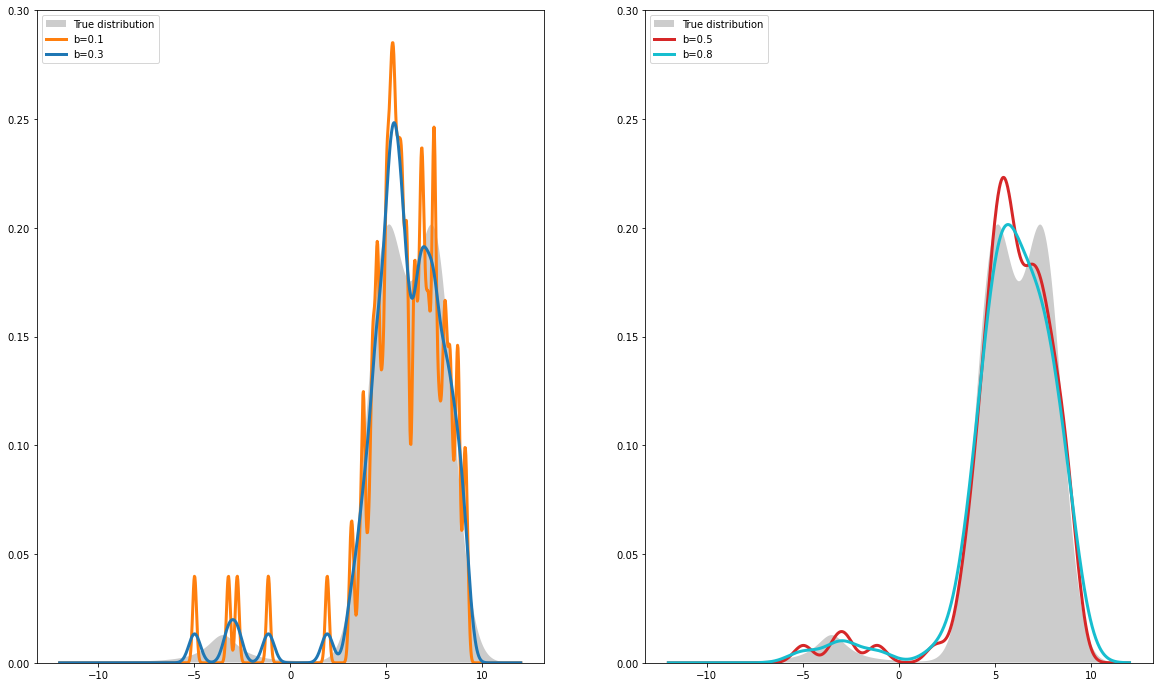

In [34]:
fig, ax = plt.subplots(1,2, figsize=(20,12))

ax[0].fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="True distribution")
ax[1].fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="True distribution")


colors=['tab:orange', 'tab:red', 'tab:blue','tab:cyan']

for i,bandwidth in enumerate([0.1,0.5, 0.3, 0.8]):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax[i%2].plot(X_plot[:,0], np.exp(log_dens), lw=3, linestyle="-", label=f"b={bandwidth}", c=colors[i])
ax[0].legend(loc='upper left')
ax[0].set_ylim(0, 0.3)
ax[1].legend(loc='upper left')
ax[1].set_ylim(0, 0.3)
plt.show()

In [35]:
def silverman(X):
    '''
    There is no built in function to compute the bandwidth with Silverman's rule in sklearn's framework 
    (see scipy.stat.gaussian_kde(dataset, bw_method='silverman') for an alternative)
    
    h = 0.9 min(sigma, IRQ/1.34)*n^(-1/5)
    '''
    
    q3, q1 = np.percentile(X, [75,25])
    iqr = q3 - q1
    sigma = np.std(X)

    return 0.9*min(sigma, iqr/1.34)*len(X)**(-1/5)

In [36]:
print(silverman(X))

0.6529414962264534


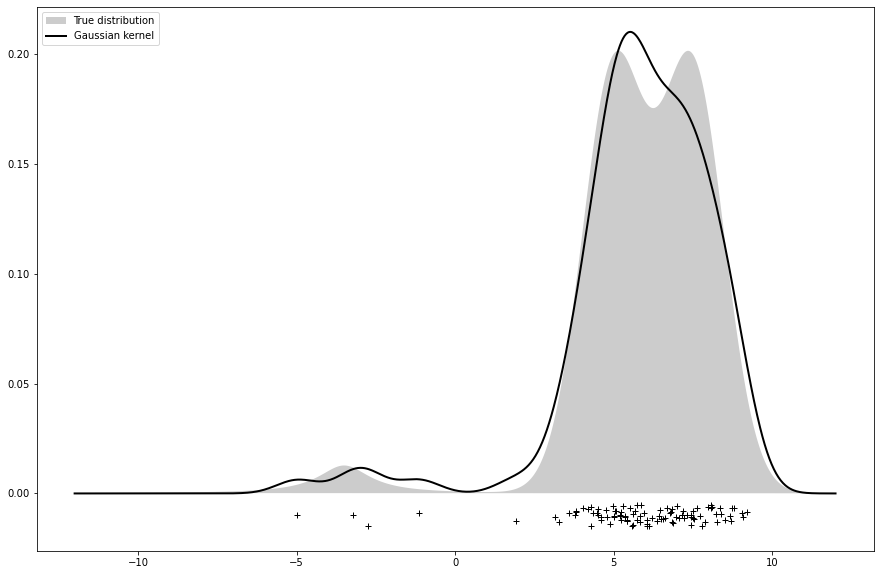

In [37]:
plt.figure(figsize=(15,10))

plt.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="True distribution")

kde = KernelDensity(kernel='gaussian', bandwidth=silverman(X)).fit(X)
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:,0], np.exp(log_dens), color="black", lw=2, linestyle="-", label="Gaussian kernel")
plt.legend(loc='upper left')


plt.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")
plt.show()